In [110]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [111]:
loan_df = pd.read_csv("loan_approval.csv")
loan_df=loan_df.head(500)
loan_df

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False
...,...,...,...,...,...,...,...,...
495,Mr. Nicolas Salas II,Port John,116951,664,11223,6,70.0,True
496,Blake Sosa,Austinside,43577,343,32607,23,25.0,False
497,Katherine Galloway,Travishaven,145097,586,27075,14,70.0,True
498,Bethany Fox,Mendozaside,47601,333,33930,22,25.0,False


<Axes: xlabel='income', ylabel='Count'>

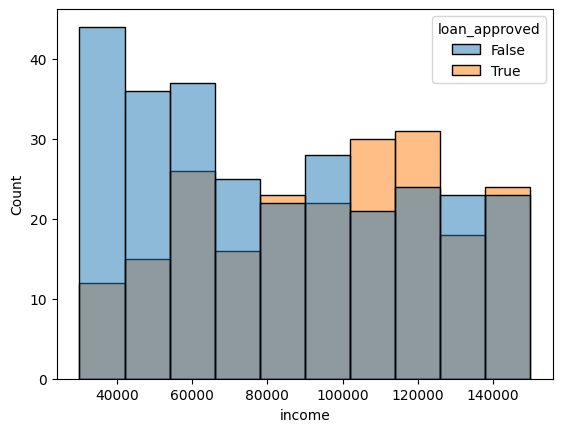

In [112]:
#how much income do you need to get the income approved?
sb.histplot(x="income",hue="loan_approved",data = loan_df)

In [113]:
#about 1 lakh

<Axes: xlabel='credit_score', ylabel='Count'>

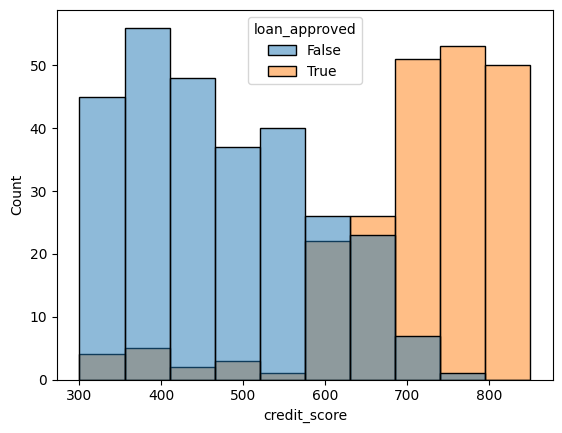

In [114]:
# the amount of credit score required for loan approval?
sb.histplot(x="credit_score",hue="loan_approved",data = loan_df)

In [115]:
#600

<Axes: xlabel='years_employed', ylabel='Count'>

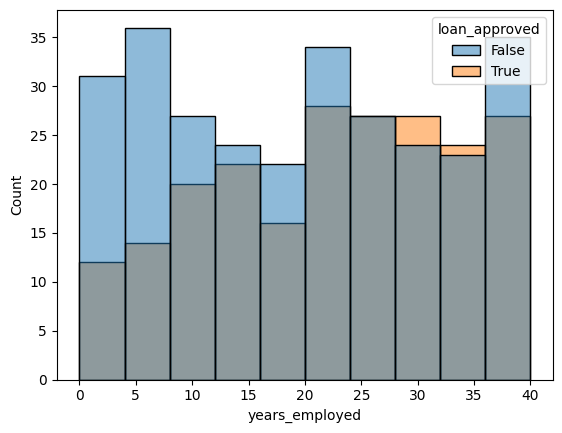

In [116]:
#does years employed affect in loan approval
sb.histplot(x="years_employed",hue= "loan_approved",data=loan_df)

In [117]:
#no years employed does not directly affect the loan approaval

<Axes: xlabel='points', ylabel='Count'>

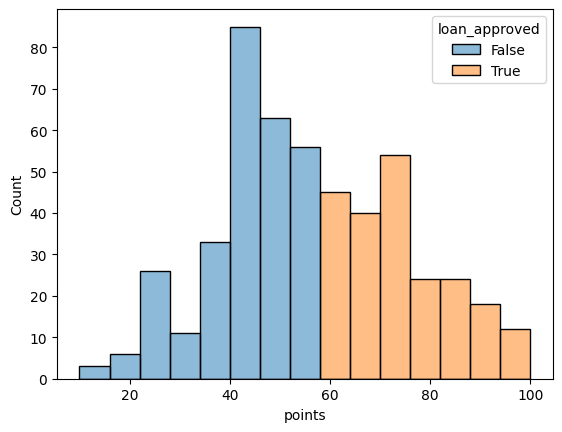

In [118]:

sb.histplot(x="points",hue="loan_approved",data = loan_df)

In [119]:
#points greater than 65 is loan approaved
#equation is =points = 0.0003*income + 0.05*(credit_score/10) + 0.5*years_employed - 0.001*loan_amount; loan_approved = points >= 65


In [120]:
x = loan_df[["income", "credit_score", "loan_amount", "years_employed"]]
y = loan_df[["points"]]

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("r2_Score",r2_score(y_test,y_pred))


mean_squared_error 50.8340168580895
r2_Score 0.8652257102516032


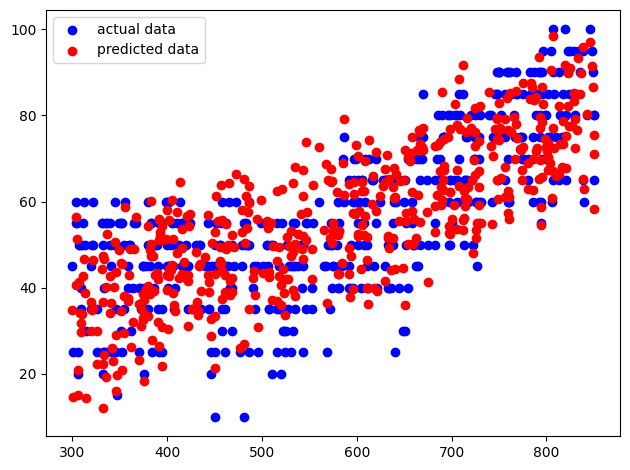

In [136]:

plt.scatter(x["credit_score"],y,label="actual data",color ="blue")
plt.scatter(x["credit_score"],model.predict(x),label ="predicted data",color = "red")
plt.tight_layout()
plt.legend()
plt.show()

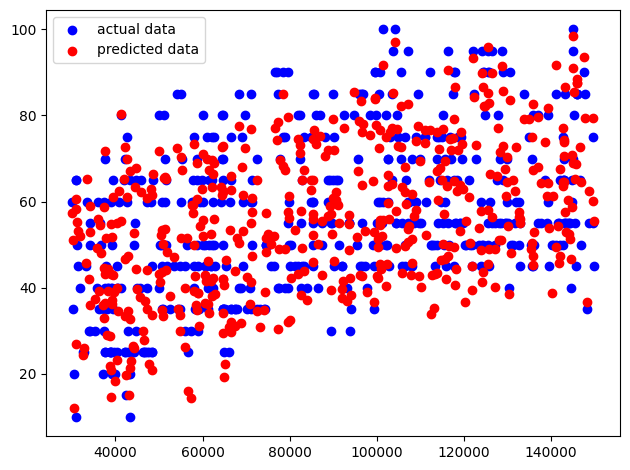

In [139]:
plt.scatter(x["income"],y,label="actual data",color ="blue")
plt.scatter(x["income"],model.predict(x),label="predicted data",color = "red")
plt.tight_layout()
plt.legend()
plt.show()